In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load data
file_path = 'data.csv'
data = pd.read_csv(file_path)
data.head()


,user_pseudo_id,recency,frequency,monetary
0,e4dfe4fb9651706c9f4d269e1e565044,256,1,0
1,d1f4569625eab3b249c3cd200d1c4fd6,512,1,0
2,1bc15184753def3334b67f8045cbb1fb,512,1,0
3,b18d3f1e73bea0ec88ff447fa5193a11,512,1,0
4,d1e3bcced12dfde70031d643fc191da2,512,1,0


In [2]:
# Display basic information about the data
data.info()
data.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_pseudo_id  25000 non-null  object
 1   recency         25000 non-null  int64 
 2   frequency       25000 non-null  int64 
 3   monetary        25000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 781.4+ KB


,user_pseudo_id,recency,frequency,monetary
9524,dd6f59bb3440d1fe8958b8aebcd7f32f,699,1,0
13863,426eea18f3739c605c6a28aebcb0d9d2,191,1,0
23069,e167efcf027d21e4c5fccc57d7682585,292,2,0
5776,26ec978ef92e3f3f2a730374d8ee8e93,166,1,0
209,200630f15edc87461baa8d75a4848c0f,520,1,0


In [3]:
# Select the RFM columns for clustering
rfm_data = data[['recency', 'frequency', 'monetary']]

# Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# Print standardized data
print(rfm_data)


       recency  frequency  monetary
0          256          1         0
1          512          1         0
2          512          1         0
3          512          1         0
4          512          1         0
...        ...        ...       ...
24995      308          2         0
24996      308          2         0
24997      308          2         0
24998      308          2         0
24999      308          2         0

[25000 rows x 3 columns]


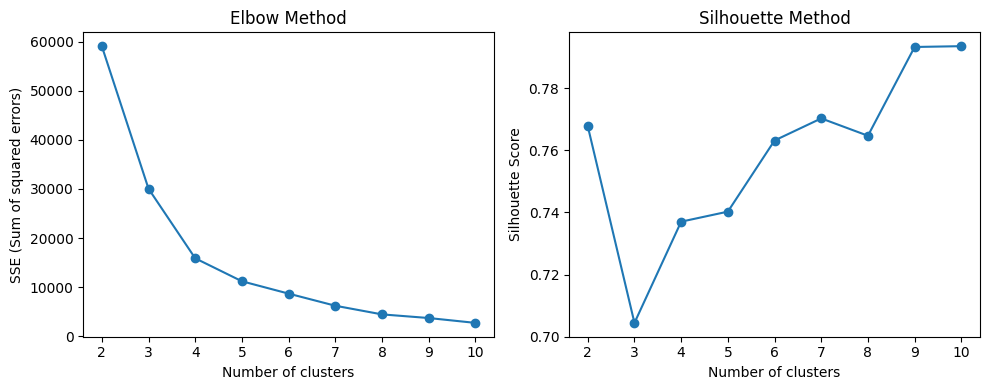

In [4]:
# Finding the optimal number of clusters using the Elbow and Silhouette methods
sse = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)
    
    # Calculate silhouette score
    score = silhouette_score(rfm_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Elbow method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of squared errors)')

# Plot the Silhouette method
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()


In [5]:
# Based on the above plots, decide the optimal number of clusters
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]

print(f"Optimal number of clusters according to Silhouette method: {optimal_clusters}")


Optimal number of clusters according to Silhouette method: 10


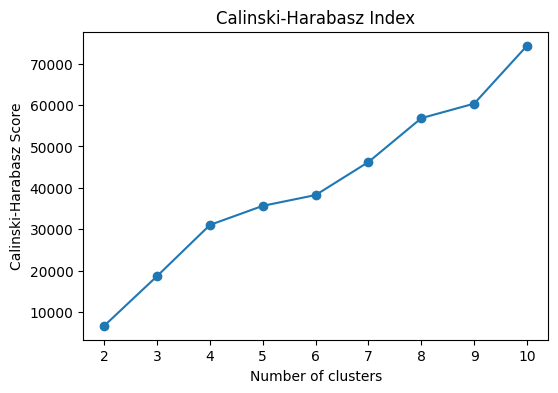

In [7]:
calinski_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    score = calinski_harabasz_score(rfm_scaled, labels)
    calinski_scores.append(score)

# Plot the Calinski-Harabasz Index
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, calinski_scores, marker='o')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.show()


In [39]:
# Apply K-Means with 10 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(rfm_scaled)

# Predict and assign labels to each data point
data['cluster'] = kmeans.labels_

# Assign cluster labels based on business significance (this step is optional and for reference only)
cluster_labels = {
    0: 'Cluster 1',
    1: 'Cluster 2',
    2: 'Cluster 3',
    3: 'Cluster 4',
    4: 'Cluster 5',
    5: 'Cluster 6',
    6: 'Cluster 7',
    7: 'Cluster 8',
    8: 'Cluster 9',
    9: 'Cluster 10'
}

data['segment'] = data['cluster'].map(cluster_labels)

# View a few rows after clustering
data[['user_pseudo_id', 'recency', 'frequency', 'monetary', 'segment']].head()

# Distribution of the number of customers in each cluster
print(data['segment'].value_counts())


segment
Cluster 1    9722
Cluster 3    8653
Cluster 2    6285
Cluster 4     333
Cluster 5       7
Name: count, dtype: int64


In [40]:
# Display the first few rows of the resulting data with segments
data[['user_pseudo_id', 'recency', 'frequency', 'monetary', 'segment']].head()

,user_pseudo_id,recency,frequency,monetary,segment
0,e4dfe4fb9651706c9f4d269e1e565044,256,1,0,Cluster 1
1,d1f4569625eab3b249c3cd200d1c4fd6,512,1,0,Cluster 3
2,1bc15184753def3334b67f8045cbb1fb,512,1,0,Cluster 3
3,b18d3f1e73bea0ec88ff447fa5193a11,512,1,0,Cluster 3
4,d1e3bcced12dfde70031d643fc191da2,512,1,0,Cluster 3


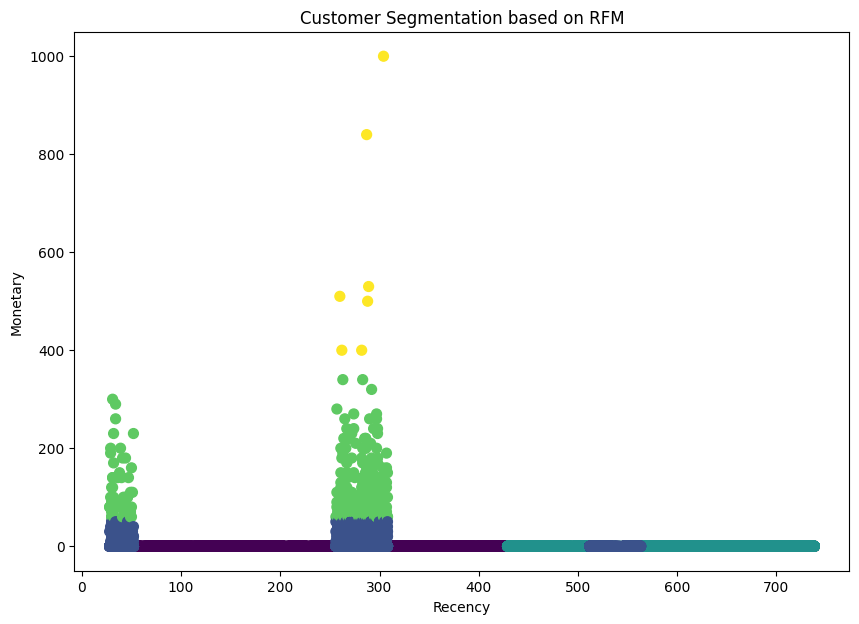

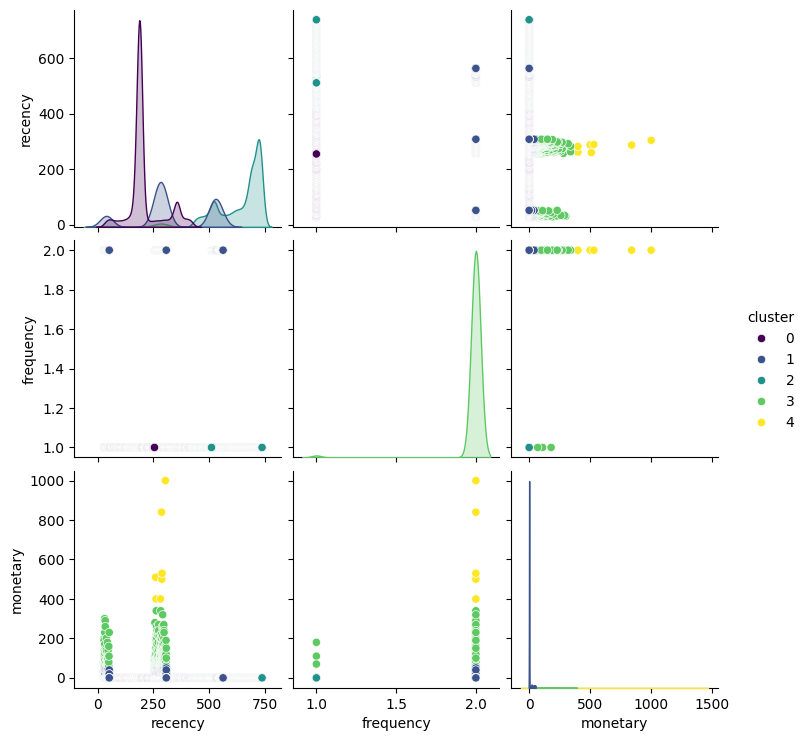

In [47]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 'recency', 'frequency', and 'monetary'
# and that the clusters have been assigned and stored in the 'cluster' column

plt.figure(figsize=(10, 7))

# Plotting the clusters with different colors
plt.scatter(data['recency'], data['monetary'], c=data['cluster'], s=50, cmap='viridis')

# Labeling the axes and title
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.title("Customer Segmentation based on RFM")

# Display the plot
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 'recency', 'frequency', 'monetary', and 'cluster'
sns.pairplot(data, hue='cluster', palette='viridis', vars=['recency', 'frequency', 'monetary'])

# Display the plot
plt.show()


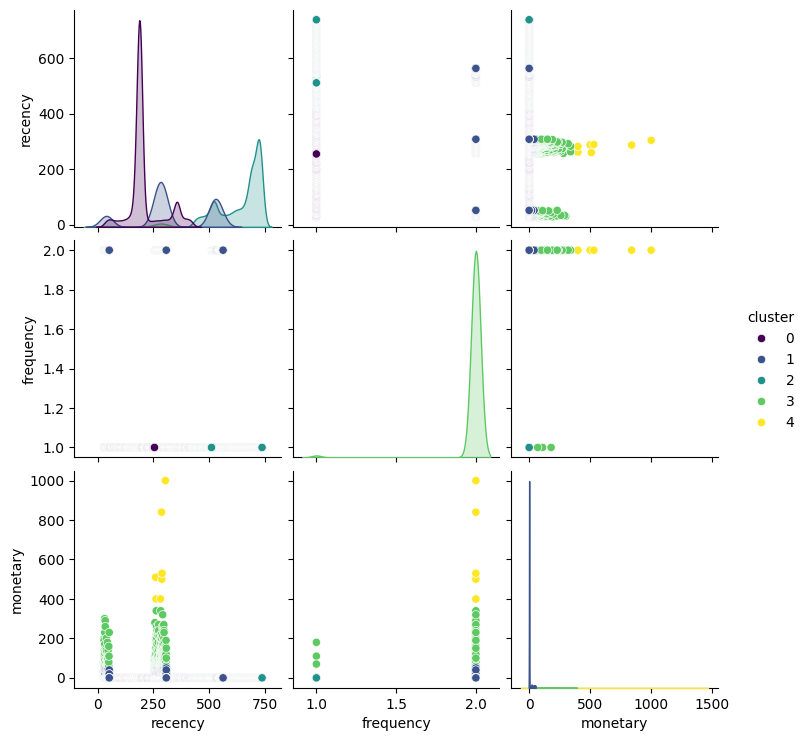

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 'recency', 'frequency', 'monetary', and 'cluster'
sns.pairplot(data, hue='cluster', palette='viridis', vars=['recency', 'frequency', 'monetary'])

# Display the plot
plt.show()


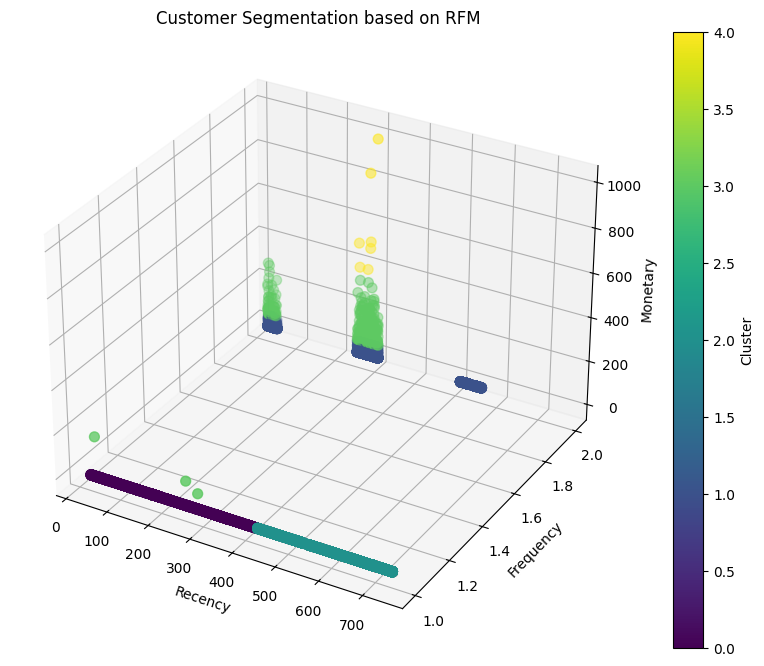

In [49]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the clusters with different colors
scatter = ax.scatter(data['recency'], data['frequency'], data['monetary'], c=data['cluster'], s=50, cmap='viridis')

# Labeling the axes and title
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
ax.set_title("Customer Segmentation based on RFM")

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

# Display the plot
plt.show()


In [45]:
import seaborn as sns
import pandas as pd

# Tạo ma trận trung bình cho mỗi cụm
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Tạo Heatmap
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm')
plt.title('Cluster Centers Heatmap')
plt.show()


ValueError: Shape of passed values is (5, 3), indices imply (5, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_pseudo_id  25000 non-null  object
 1   recency         25000 non-null  int64 
 2   frequency       25000 non-null  int64 
 3   monetary        25000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 781.4+ KB


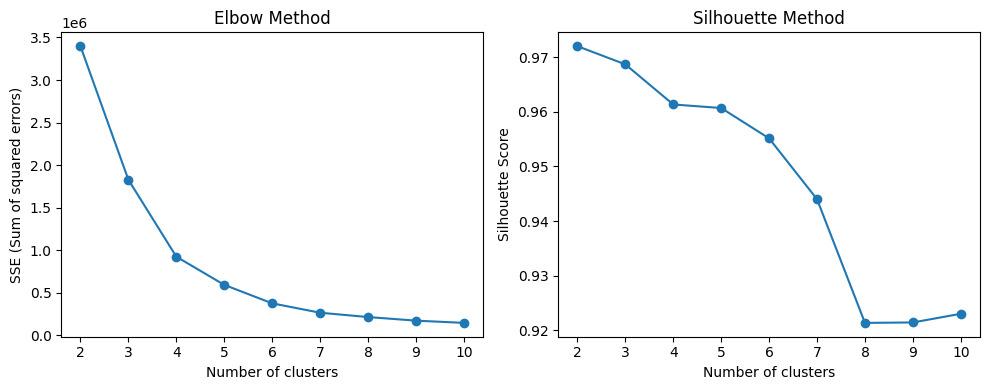

Optimal number of clusters according to Silhouette method: 2
                     user_pseudo_id  log_recency  log_frequency  monetary  \
0  e4dfe4fb9651706c9f4d269e1e565044    -0.319478      -0.600268         0   
1  d1f4569625eab3b249c3cd200d1c4fd6     0.659594      -0.600268         0   
2  1bc15184753def3334b67f8045cbb1fb     0.659594      -0.600268         0   
3  b18d3f1e73bea0ec88ff447fa5193a11     0.659594      -0.600268         0   
4  d1e3bcced12dfde70031d643fc191da2     0.659594      -0.600268         0   

     segment  
0  Cluster 1  
1  Cluster 1  
2  Cluster 1  
3  Cluster 1  
4  Cluster 1  
segment
Cluster 1    24766
Cluster 2      234
Name: count, dtype: int64


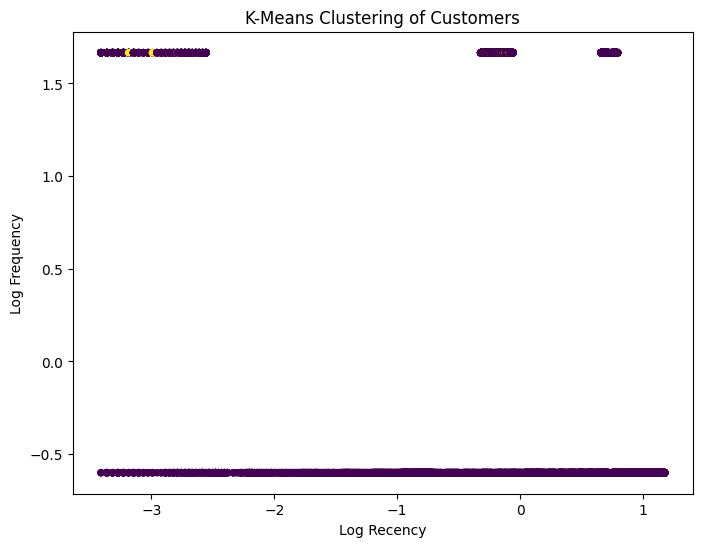

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load your data
data = pd.read_csv('data.csv')

# Display basic information about the data
data.info()
data.sample(5)

# Feature Engineering: Log transformation for 'recency' and 'frequency'
data['log_recency'] = np.log1p(data['recency'])
data['log_frequency'] = np.log1p(data['frequency'])

# Standardization of the data
scaler = StandardScaler()
data[['log_recency', 'log_frequency']] = scaler.fit_transform(data[['log_recency', 'log_frequency']])

# Optional: Removing rows where 'monetary' is 0 if they are not informative
# data = data[data['monetary'] > 0]

# Selecting the features for clustering
rfm_data = data[['log_recency', 'log_frequency', 'monetary']]

# Finding the optimal number of clusters using the Elbow and Silhouette methods
sse = []
silhouette_scores = []
cluster_range = range(2, 11)  # Evaluate up to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_data)
    sse.append(kmeans.inertia_)
    
    # Calculate silhouette score
    score = silhouette_score(rfm_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Elbow method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of squared errors)')

# Plot the Silhouette method
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

# Based on the plots, decide the optimal number of clusters
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters according to Silhouette method: {optimal_clusters}")

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(rfm_data)

# Predict and assign labels to each data point
data['cluster'] = kmeans.labels_

# Optional: Assign cluster labels based on business significance
cluster_labels = {
    0: 'Cluster 1',
    1: 'Cluster 2',
    2: 'Cluster 3',
    3: 'Cluster 4',
    4: 'Cluster 5',
    5: 'Cluster 6',
    6: 'Cluster 7',
    7: 'Cluster 8',
    8: 'Cluster 9',
    9: 'Cluster 10'
}

data['segment'] = data['cluster'].map(cluster_labels)

# View a few rows after clustering
print(data[['user_pseudo_id', 'log_recency', 'log_frequency', 'monetary', 'segment']].head())

# Distribution of the number of customers in each cluster
print(data['segment'].value_counts())

# Visualize the clusters (if using 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(data['log_recency'], data['log_frequency'], c=data['cluster'], cmap='viridis', s=20)
plt.xlabel('Log Recency')
plt.ylabel('Log Frequency')
plt.title('K-Means Clustering of Customers')
plt.show()


In [25]:
from scipy import stats

# Loại bỏ các điểm ngoại lệ dựa trên z-score
z_scores = np.abs(stats.zscore(data[['recency', 'frequency', 'monetary']]))
data_filtered = data[(z_scores < 3).all(axis=1)]

# Standardization of the data
scaler = StandardScaler()
data_filtered_scaled = scaler.fit_transform(data_filtered[['recency', 'frequency', 'monetary']])

# Tìm số lượng cụm tối ưu bằng KMeans
sse = []
silhouette_scores = []
cluster_range = range(3, 7)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_filtered_scaled)
    sse.append(kmeans.inertia_)
    score = silhouette_score(data_filtered_scaled, kmeans.labels_)
    silhouette_scores.append(score)

optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_clusters}")


Optimal number of clusters: 5


In [27]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


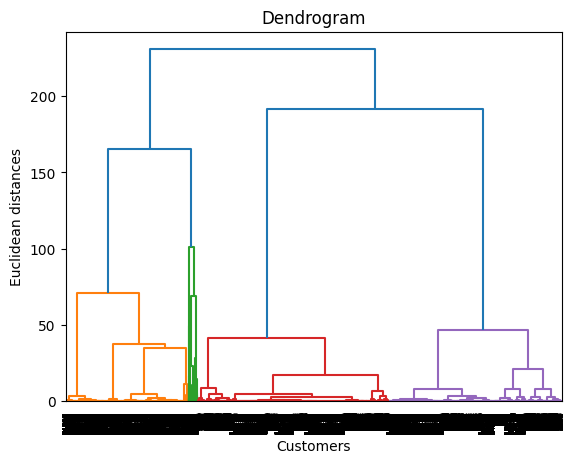

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [26]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Standardization of the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['recency', 'frequency', 'monetary']])

# Xây dựng dendrogram để chọn số lượng cụm
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Sử dụng Agglomerative Clustering với số cụm xác định từ dendrogram
hc = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
data['cluster'] = hc.fit_predict(data_scaled)


In [ ]:
from sklearn.decomposition import PCA

# Standardization of the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['recency', 'frequency', 'monetary']])

# Áp dụng PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Áp dụng KMeans trên dữ liệu đã qua PCA
sse = []
silhouette_scores = []
cluster_range = range(3, 7)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    sse.append(kmeans.inertia_)
    score = silhouette_score(data_pca, kmeans.labels_)
    silhouette_scores.append(score)

optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_clusters}")

# Áp dụng KMeans với số cụm tối ưu
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data_pca)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['cluster'], cmap='viridis', s=20)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()


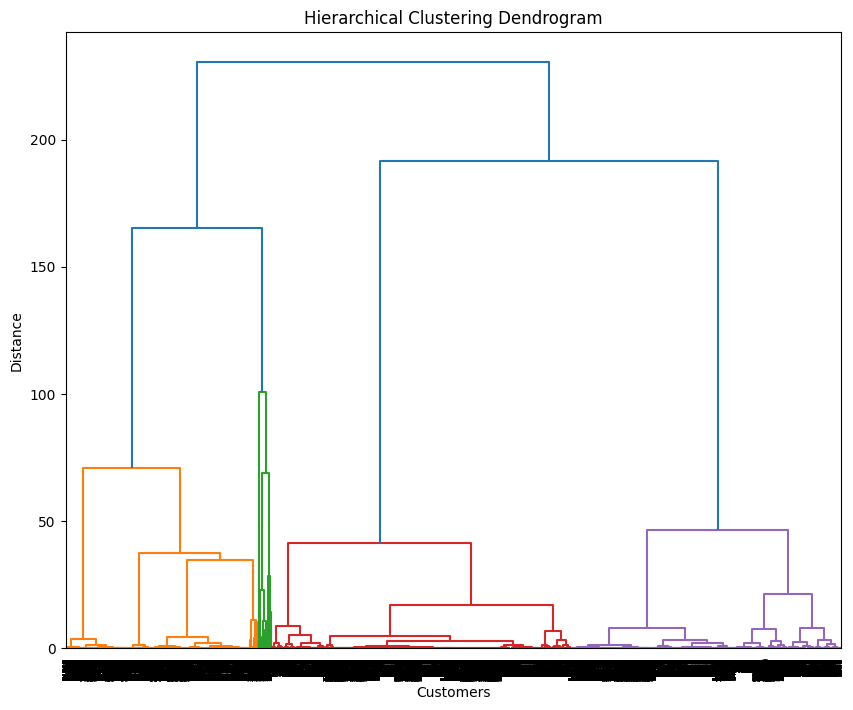

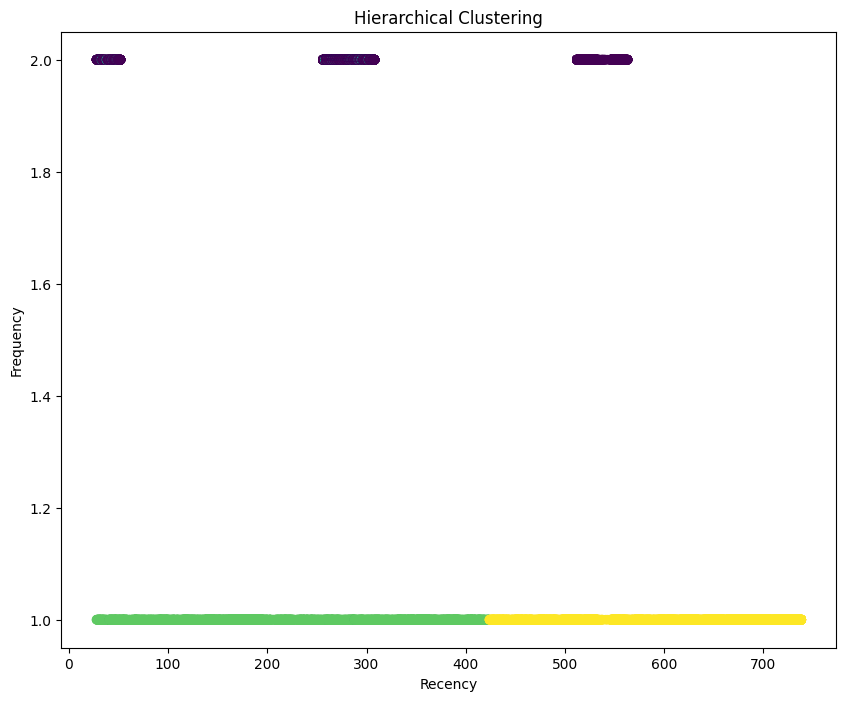

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Tạo ma trận liên kết
Z = linkage(data_scaled, method='ward')

# Vẽ dendrogram
plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

# Số lượng cụm lý tưởng (ví dụ: chọn chiều cao cắt ngang dendrogram)
data['Cluster'] = fcluster(Z, t=5, criterion='maxclust')

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(10, 8))
plt.scatter(data['recency'], data['frequency'], c=data['Cluster'], cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


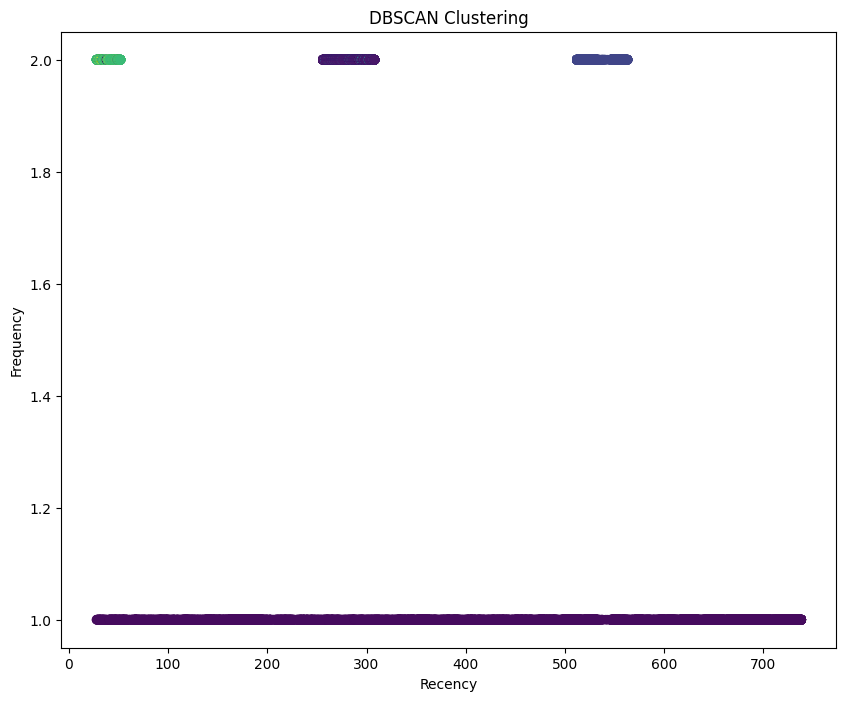

Silhouette Score: 0.597163066833322


In [29]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Sử dụng DBSCAN để phân cụm
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data_scaled)

# Thêm kết quả phân cụm vào dataframe
data['Cluster'] = clusters

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(10, 8))
plt.scatter(data['recency'], data['frequency'], c=data['Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# Tính Silhouette Score
score = silhouette_score(data_scaled, clusters)
print(f'Silhouette Score: {score}')


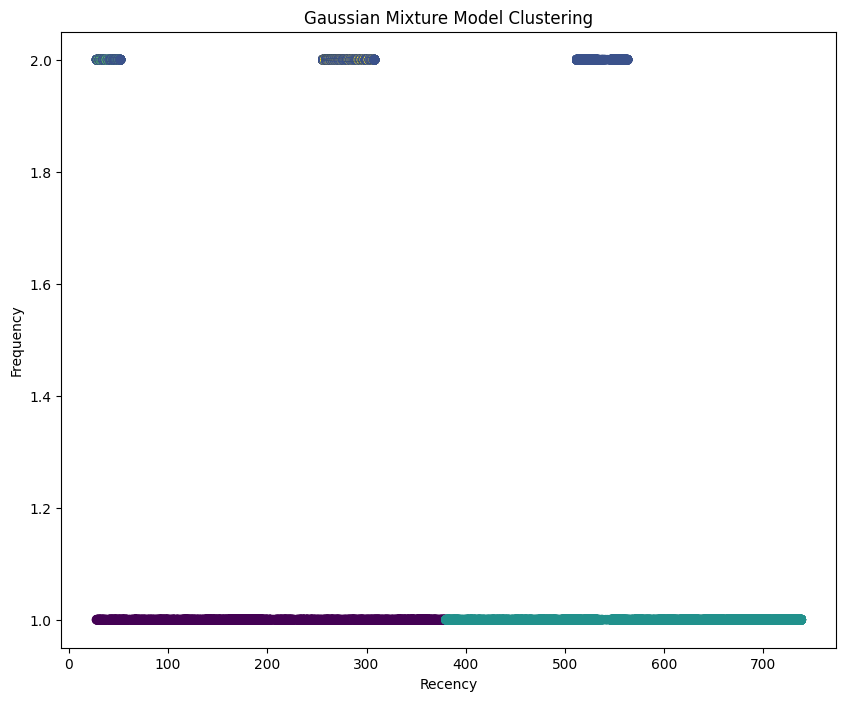

In [30]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=0)
clusters = gmm.fit_predict(data_scaled)

# Thêm kết quả phân cụm vào dataframe
data['Cluster'] = clusters

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(10, 8))
plt.scatter(data['recency'], data['frequency'], c=data['Cluster'], cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


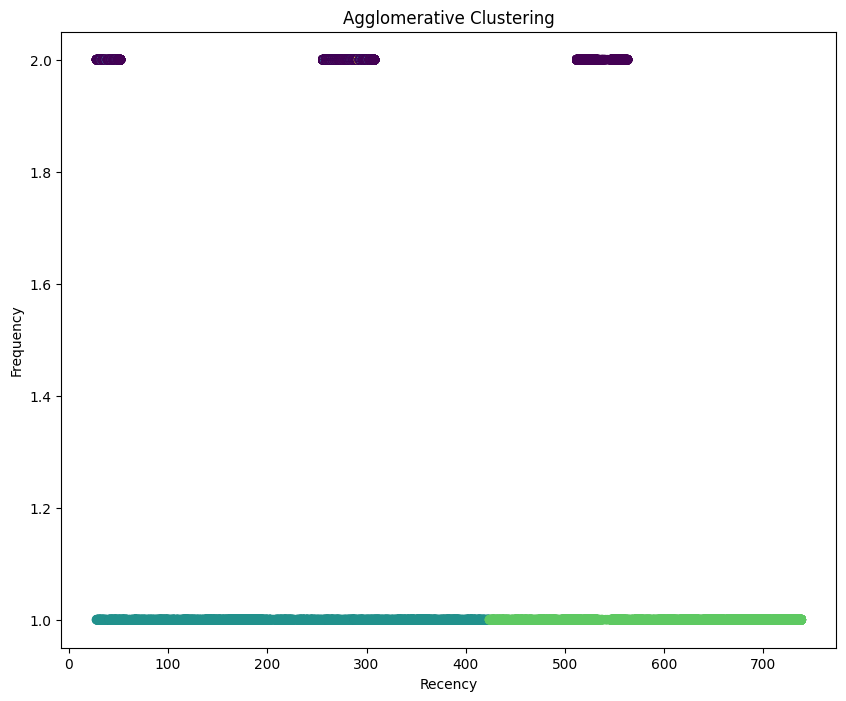

In [31]:
from sklearn.cluster import AgglomerativeClustering

# Sử dụng Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=5)
clusters = agg.fit_predict(data_scaled)

# Thêm kết quả phân cụm vào dataframe
data['Cluster'] = clusters

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(10, 8))
plt.scatter(data['recency'], data['frequency'], c=data['Cluster'], cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


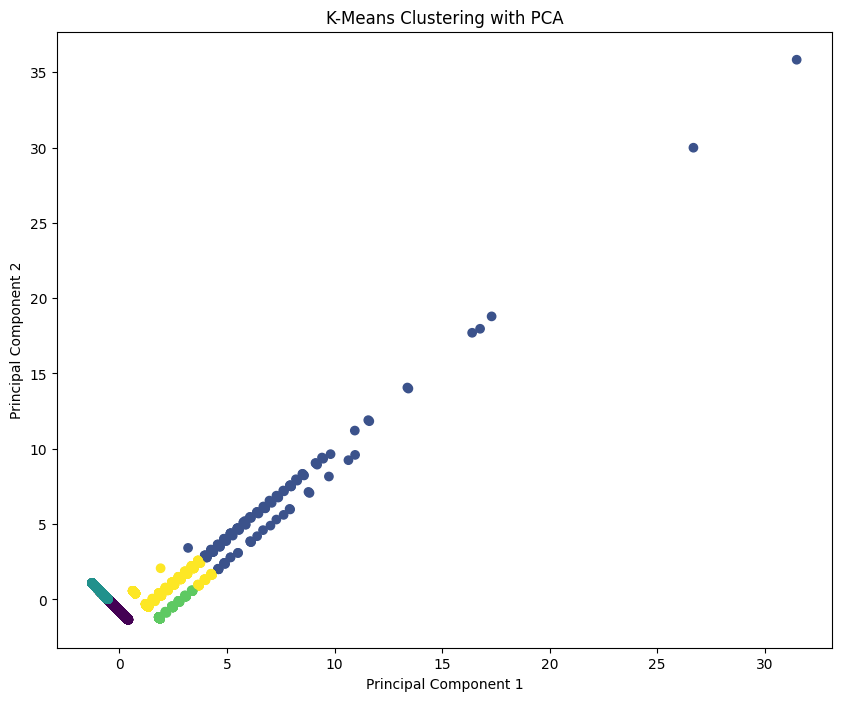

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['recency', 'frequency', 'monetary']])

# Giảm chiều bằng PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Áp dụng K-Means trên dữ liệu đã giảm chiều
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(data_pca)

# Thêm kết quả phân cụm vào dataframe
data['Cluster'] = clusters

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


C:\Users\ADMIN\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


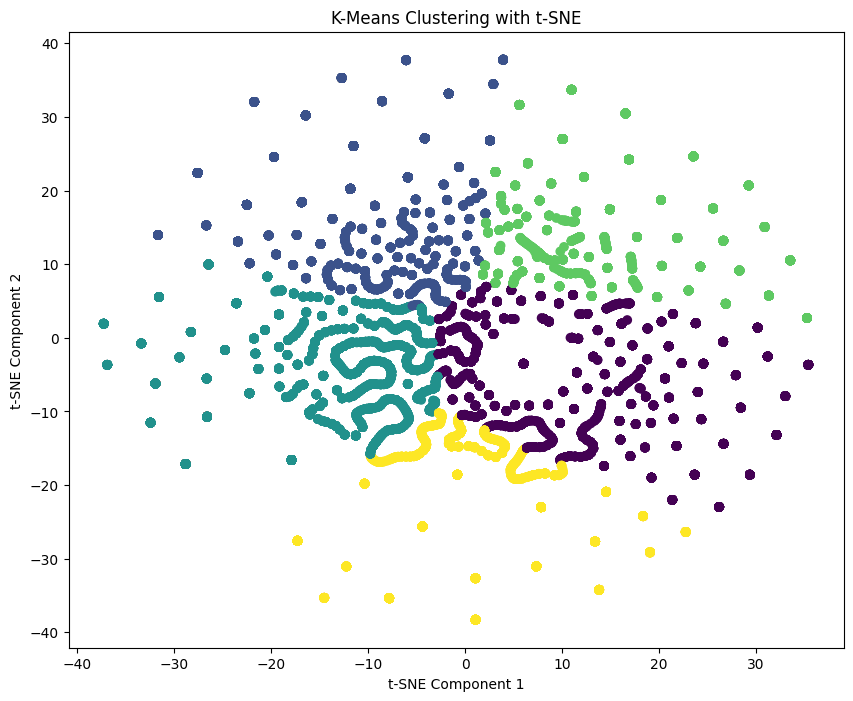

In [33]:
from sklearn.manifold import TSNE

# Giảm chiều bằng t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
data_tsne = tsne.fit_transform(data_scaled)

# Áp dụng K-Means trên dữ liệu đã giảm chiều
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(data_tsne)

# Thêm kết quả phân cụm vào dataframe
data['Cluster'] = clusters

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(10, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [37]:
from sklearn.utils import resample

# Lấy mẫu nhỏ từ dữ liệu để giảm yêu cầu bộ nhớ
sample_size = 1000  # Bạn có thể thay đổi số lượng này
data_sample = resample(data_scaled, n_samples=sample_size, random_state=0)
data_tsne_sample = resample(data_tsne, n_samples=sample_size, random_state=0)

# Tính toán ma trận khoảng cách trên mẫu
original_distances = pairwise_distances(data_sample)
tsne_distances = pairwise_distances(data_tsne_sample)

# Tính toán hệ số tương quan giữa hai ma trận khoảng cách
correlation = np.corrcoef(original_distances.ravel(), tsne_distances.ravel())[0, 1]

print(f"Hệ số tương quan giữa ma trận khoảng cách gốc và ma trận sau khi giảm chiều (với mẫu nhỏ): {correlation:.4f}")


Hệ số tương quan giữa ma trận khoảng cách gốc và ma trận sau khi giảm chiều (với mẫu nhỏ): 0.4789


In [38]:
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors

# Xác định số lượng hàng xóm gần nhất cần kiểm tra
n_neighbors = 10

# Tính toán ma trận khoảng cách cho các hàng xóm gần nhất trong không gian gốc
nbrs_original = NearestNeighbors(n_neighbors=n_neighbors).fit(data_scaled)
distances_original, _ = nbrs_original.kneighbors(data_scaled)

# Tính toán ma trận khoảng cách cho các hàng xóm gần nhất trong không gian t-SNE
nbrs_tsne = NearestNeighbors(n_neighbors=n_neighbors).fit(data_tsne)
distances_tsne, _ = nbrs_tsne.kneighbors(data_tsne)

# Tính toán hệ số tương quan giữa hai ma trận khoảng cách
correlation = np.corrcoef(distances_original.ravel(), distances_tsne.ravel())[0, 1]

print(f"Hệ số tương quan giữa ma trận khoảng cách gốc và ma trận sau khi giảm chiều (cục bộ): {correlation:.4f}")


Hệ số tương quan giữa ma trận khoảng cách gốc và ma trận sau khi giảm chiều (cục bộ): 0.0634


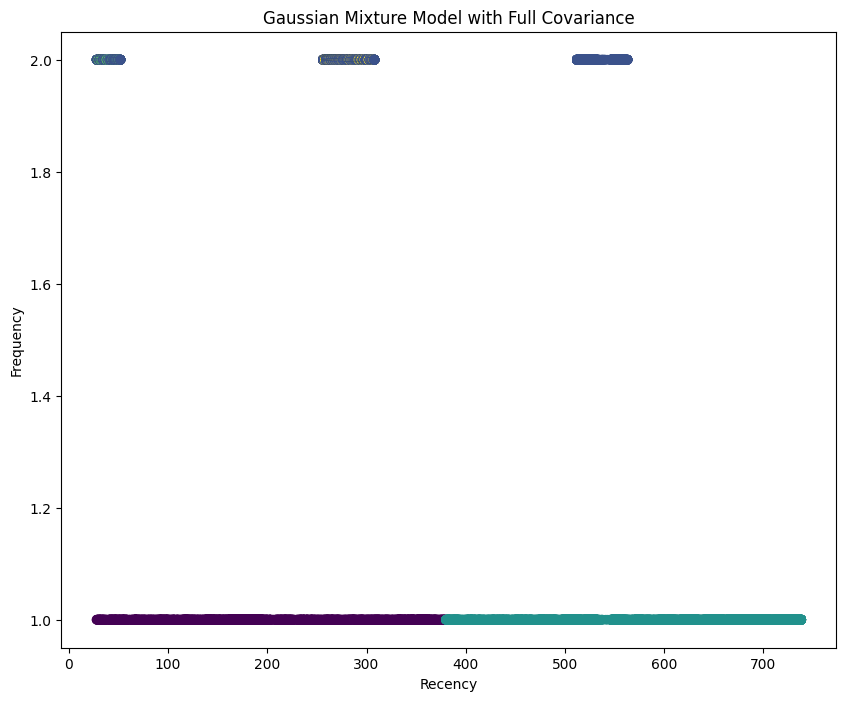

In [35]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model với covariance='full'
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=0)
clusters = gmm.fit_predict(data_scaled)

# Thêm kết quả phân cụm vào dataframe
data['Cluster'] = clusters

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(10, 8))
plt.scatter(data['recency'], data['frequency'], c=data['Cluster'], cmap='viridis')
plt.title('Gaussian Mixture Model with Full Covariance')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()
